<a href="https://colab.research.google.com/github/Drankenstain/Data_Analytics/blob/main/Clustering_Earthquake_in_Indonesia_using_K_Means_and_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kekavigi/earthquakes-in-indonesia

Dataset URL: https://www.kaggle.com/datasets/kekavigi/earthquakes-in-indonesia
License(s): ODbL-1.0
earthquakes-in-indonesia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q earthquakes-in-indonesia.zip

replace katalog_gempa.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip3 install basemap

In [ ]:
!pip install pandas tabulate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tabulate import tabulate
import seaborn as sns

In [ ]:
dataset = pd.read_csv("katalog_gempa.csv")
df_cleaned = dataset.dropna(axis=1)

start_date = '2022-01-01'
end_date = '2023-01-01'
dataset_SetTime = df_cleaned[(df_cleaned['tgl'] >= start_date) & (df_cleaned['tgl'] < end_date)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


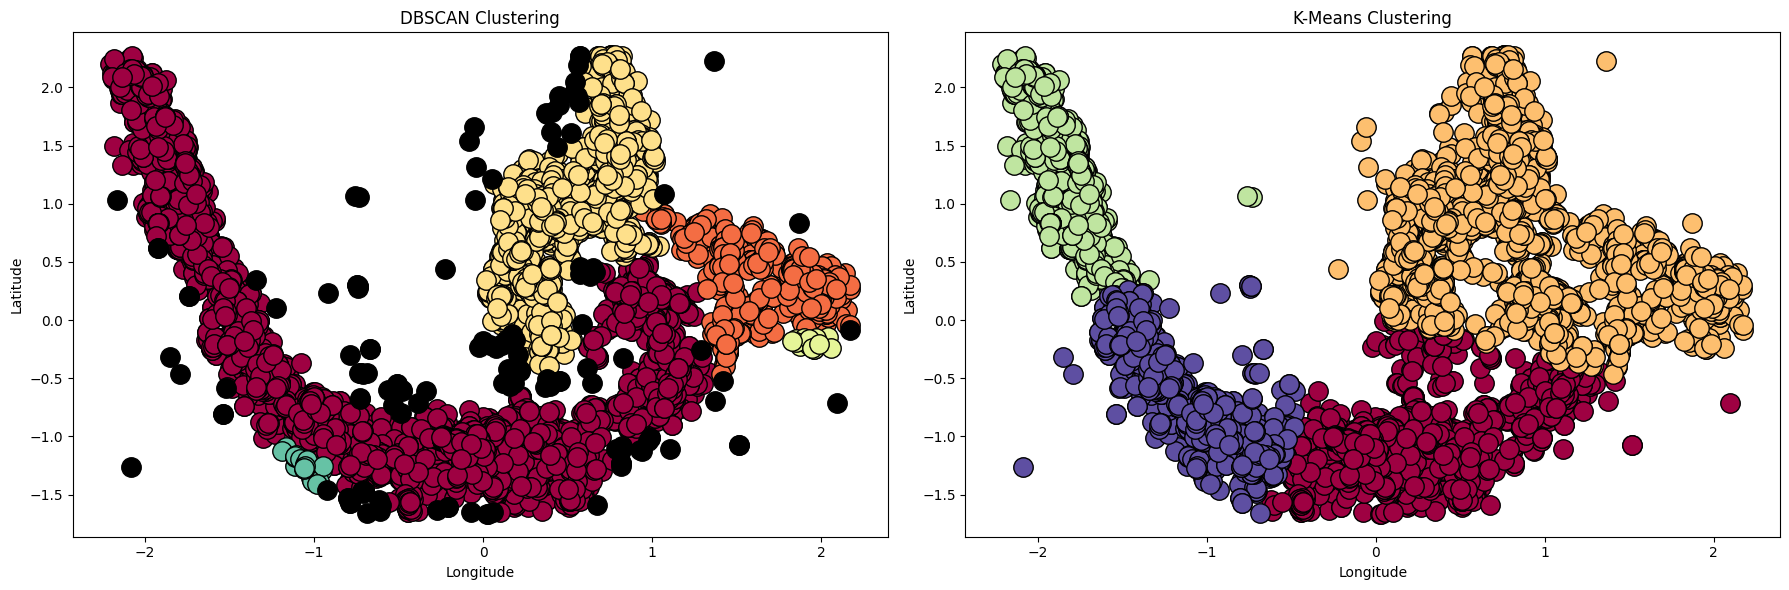

In [ ]:
df = pd.DataFrame(dataset_SetTime)

# Normalisasi data (DBSCAN dan KMeans sensitif terhadap skala)
scaler = StandardScaler()
df[['lat', 'lon']] = scaler.fit_transform(df[['lat', 'lon']])

# Terapkan DBSCAN
db = DBSCAN(eps=0.1, min_samples=10).fit(df[['lat', 'lon']])
df['dbscan_cluster'] = db.labels_

# Terapkan K-Means dengan asumsi kita ingin 3 cluster
kmeans = KMeans(n_clusters=4, random_state=42).fit(df[['lat', 'lon']])
df['kmeans_cluster'] = kmeans.labels_

# Plot hasil clustering DBSCAN
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (df['dbscan_cluster'] == k)

    xy = df[class_member_mask]
    plt.plot(xy['lon'], xy['lat'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot hasil clustering K-Means
plt.subplot(1, 2, 2)

unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (df['kmeans_cluster'] == k)

    xy = df[class_member_mask]
    plt.plot(xy['lon'], xy['lat'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

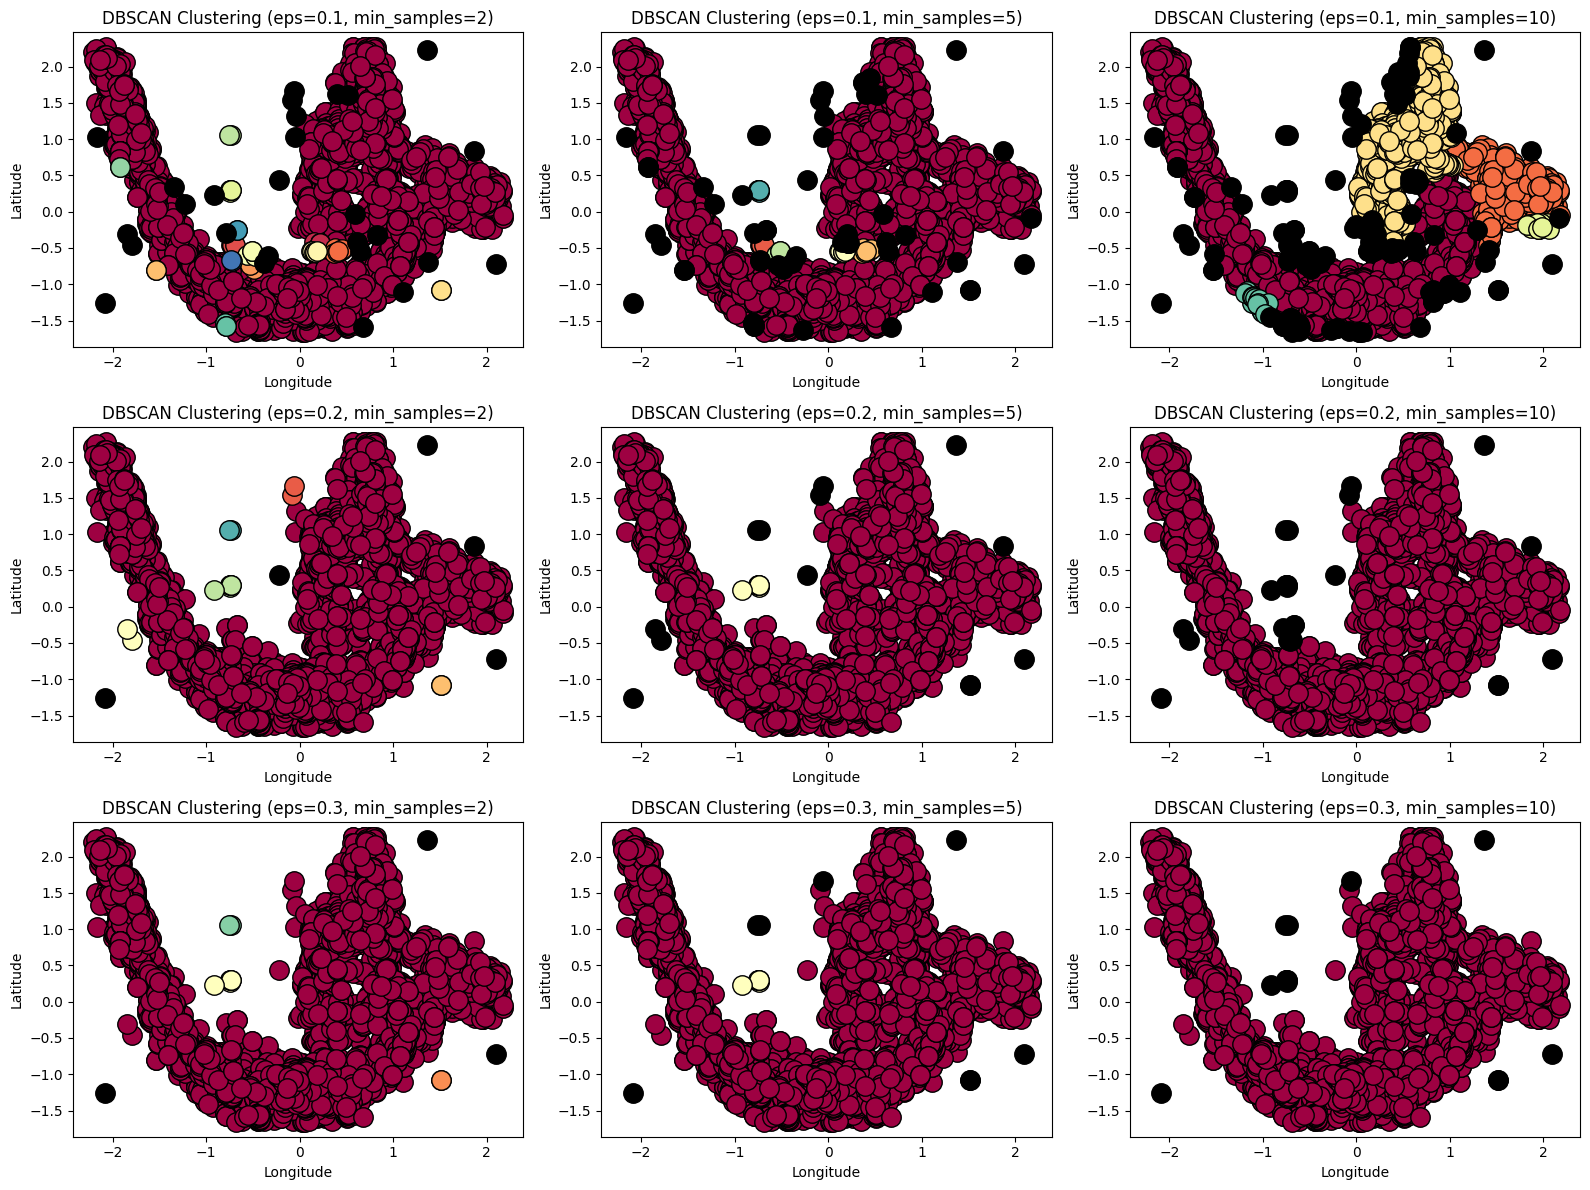

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.DataFrame(dataset_SetTime)

# Normalisasi data (DBSCAN sensitif terhadap skala)
scaler = StandardScaler()
df[['lat', 'lon']] = scaler.fit_transform(df[['lat', 'lon']])

# Mencoba berbagai nilai eps dan min_samples
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [2, 5, 10]

plt.figure(figsize=(16, 4 * len(eps_values)))
plot_num = 1

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(df[['lat', 'lon']])
        df['dbscan_cluster'] = db.labels_

        plt.subplot(len(eps_values), len(min_samples_values), plot_num)

        unique_labels = set(db.labels_)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]

            class_member_mask = (df['dbscan_cluster'] == k)
            xy = df[class_member_mask]
            plt.plot(xy['lon'], xy['lat'], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

        plot_num += 1

plt.tight_layout()
plt.show()


<ipython-input-14-ec39993105f1>:42: FutureWarning: The provided callable <function sum at 0x7b3e12b7b250> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sns.heatmap(cluster_counts_df.pivot_table(index='Cluster', values='Number of Points', aggfunc=np.sum).fillna(0),
<ipython-input-14-ec39993105f1>:42: FutureWarning: The provided callable <function sum at 0x7b3e12b7b250> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sns.heatmap(cluster_counts_df.pivot_table(index='Cluster', values='Number of Points', aggfunc=np.sum).fillna(0),
<ipython-input-14-ec39993105f1>:42: FutureWarning: The provided callable <function sum at 0x7b3e12b7b250> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used

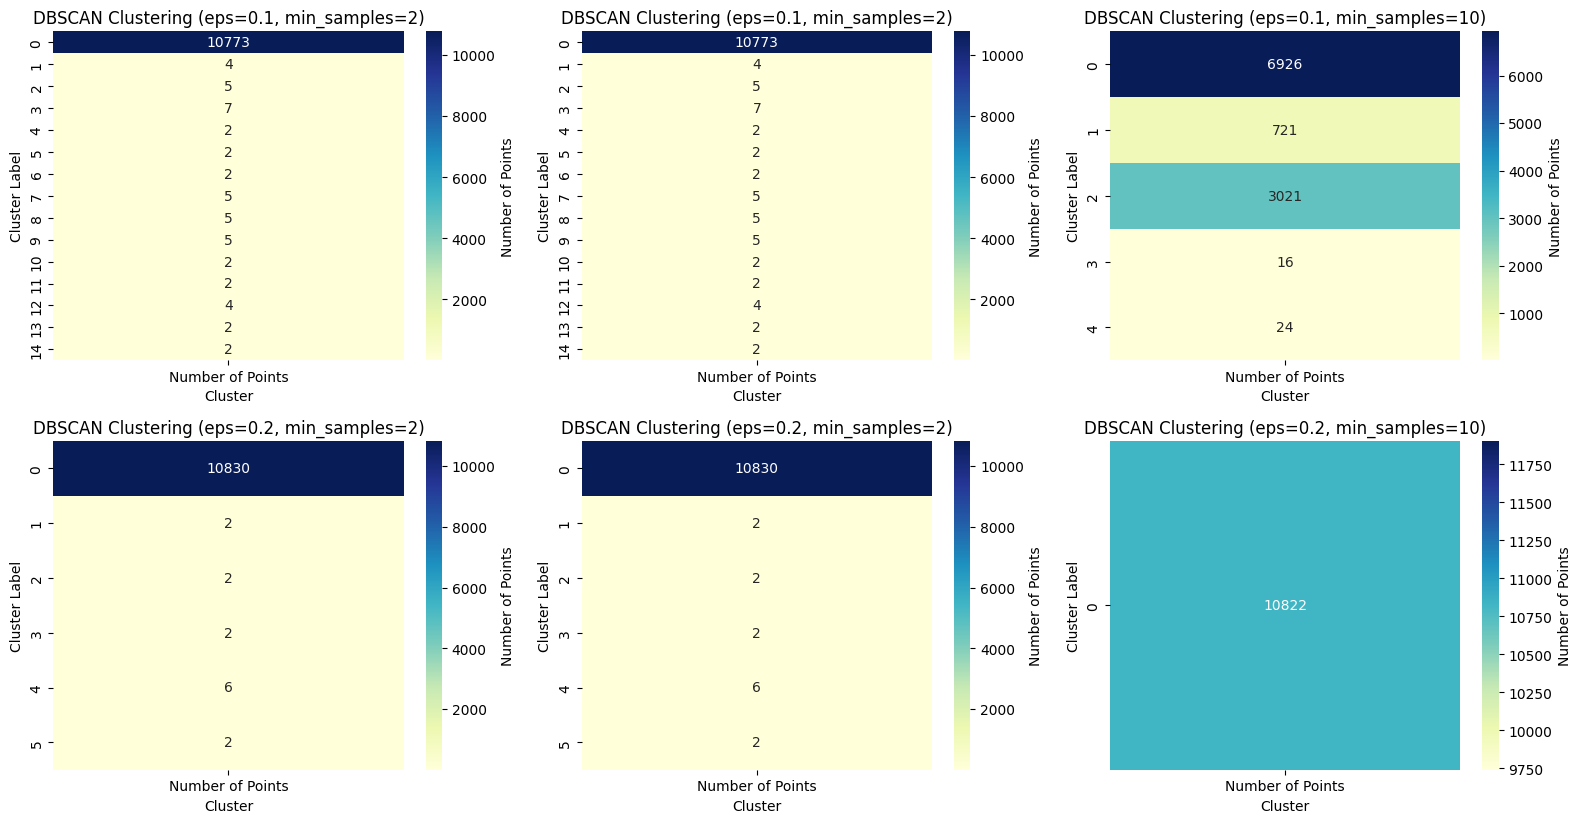

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh dataset dengan kolom 'lat' dan 'lon'
df = pd.DataFrame(dataset_SetTime)

# Normalisasi data (DBSCAN sensitif terhadap skala)
scaler = StandardScaler()
df[['lat', 'lon']] = scaler.fit_transform(df[['lat', 'lon']])

# Coba berbagai nilai eps dan min_samples
eps_values = [0.1, 0.2, 1.0]
min_samples_values = [2, 2, 10]

plt.figure(figsize=(16, 4 * len(eps_values)))
plot_num = 1

for eps in eps_values:
    for min_samples in min_samples_values:
        # Terapkan DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(df[['lat', 'lon']])
        df['dbscan_cluster'] = db.labels_

        # Hanya tampilkan hasil jika ada lebih dari 1 cluster yang terbentuk
        if len(set(db.labels_)) > 1:
            plt.subplot(len(eps_values), len(min_samples_values), plot_num)

            # Hitung jumlah titik dalam setiap cluster (tidak termasuk noise)
            cluster_counts = df[df['dbscan_cluster'] != -1].groupby('dbscan_cluster').size()

            # Persiapkan data untuk heatmap
            cluster_counts_df = pd.DataFrame({
                'Cluster': cluster_counts.index,
                'Number of Points': cluster_counts.values
            })

            # Buat heatmap menggunakan seaborn
            sns.heatmap(cluster_counts_df.pivot_table(index='Cluster', values='Number of Points', aggfunc=np.sum).fillna(0),
                        annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Number of Points'})
            plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
            plt.xlabel('Cluster')
            plt.ylabel('Cluster Label')

            plot_num += 1

plt.tight_layout()
plt.show()


<ipython-input-15-39a98d8041b3>:22: FutureWarning: The provided callable <function sum at 0x7b3e12b7b250> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sns.heatmap(cluster_counts_df.pivot_table(index='Cluster', values='Number of Points', aggfunc=np.sum).fillna(0),


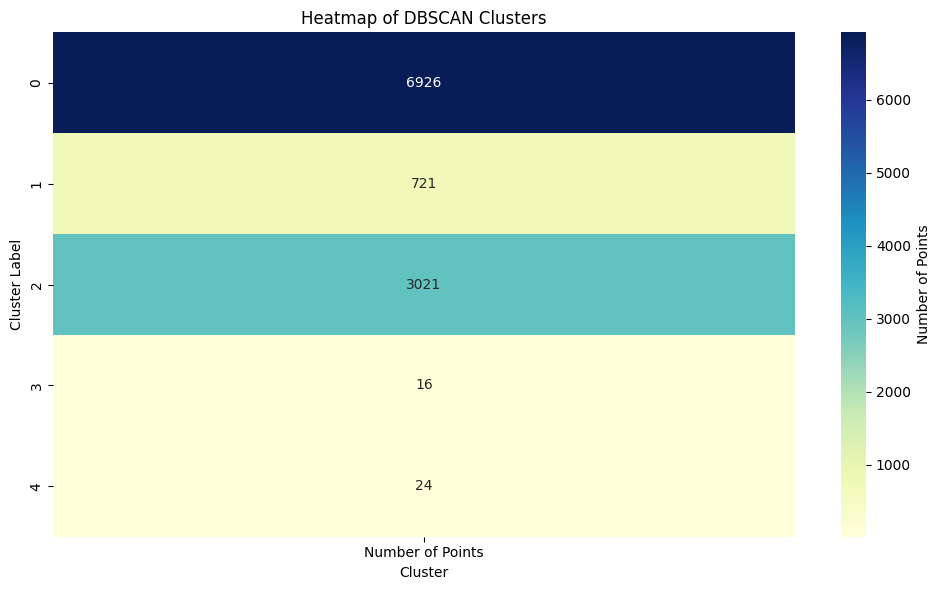

In [ ]:
df = pd.DataFrame(dataset_SetTime)

# Normalisasi data (DBSCAN sensitif terhadap skala)
scaler = StandardScaler()
df[['lat', 'lon']] = scaler.fit_transform(df[['lat', 'lon']])

# Terapkan DBSCAN
db = DBSCAN(eps=0.1, min_samples=10).fit(df[['lat', 'lon']])
df['dbscan_cluster'] = db.labels_

# Hitung jumlah titik dalam setiap cluster (tidak termasuk noise)
cluster_counts = df[df['dbscan_cluster'] != -1].groupby('dbscan_cluster').size()

# Persiapkan data untuk heatmap
cluster_counts_df = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Number of Points': cluster_counts.values
})

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_counts_df.pivot_table(index='Cluster', values='Number of Points', aggfunc=np.sum).fillna(0),
            annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Number of Points'})
plt.title('Heatmap of DBSCAN Clusters')
plt.xlabel('Cluster')
plt.ylabel('Cluster Label')
plt.tight_layout()
plt.show()

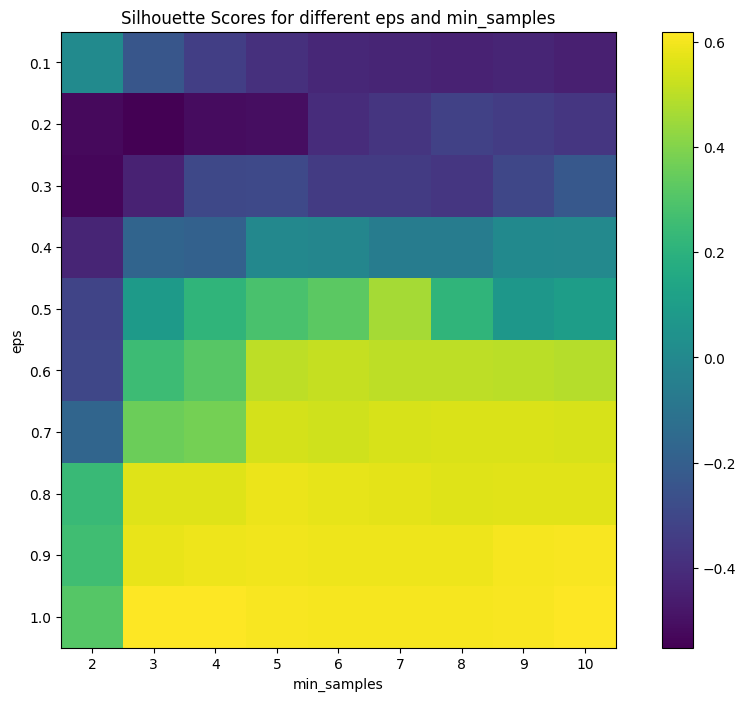

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Contoh data gempa bumi (latitude, longitude, magnitudo, kedalaman)
df = pd.DataFrame(dataset_SetTime)

# Memilih fitur untuk klasterisasi
X = df[['lat', 'lon', 'mag', 'depth']].values

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define range for epsilon and min_samples
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = np.arange(2, 11)

# Initialize an array to store silhouette scores
scores = np.zeros((len(eps_range), len(min_samples_range)))

# Loop through each combination of epsilon and min_samples
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        # Apply DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_

        # Only calculate silhouette score if there are more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            scores[i, j] = score
        else:
            scores[i, j] = -1  # Assign a very low score if only 1 cluster

# Plot the results
plt.figure(figsize=(12, 8))
plt.imshow(scores, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(min_samples_range)), min_samples_range)
plt.yticks(np.arange(len(eps_range)), [f"{eps:.1f}" for eps in eps_range])
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Silhouette Scores for different eps and min_samples')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Contoh data gempa bumi (latitude, longitude, magnitudo, kedalaman)

df = pd.DataFrame(dataset_SetTime)

# Memilih fitur untuk klasterisasi
X = df[['lat', 'lon']].values

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameter untuk K-Means
k = 5  # Jumlah klaster untuk K-Means
random_state_kmeans = 42

# Parameter untuk DBSCAN
eps_dbscan = 0.1
min_samples_dbscan = 10

# Inisialisasi model K-Means dan DBSCAN
kmeans = KMeans(n_clusters=k, random_state=random_state_kmeans).fit(X_scaled)
dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan).fit(X_scaled)

# Hitung label dan koefisien siluet untuk K-Means
labels_kmeans = kmeans.labels_
silhouette_score_kmeans = silhouette_score(X_scaled, labels_kmeans)

# Hitung label dan koefisien siluet untuk DBSCAN
labels_dbscan = dbscan.labels_
silhouette_score_dbscan = silhouette_score(X_scaled, labels_dbscan)

# Menyiapkan data untuk tabel
dataset_SetTime = {
    'Algorithm': ['K-Means', 'DBSCAN'],
    'Parameters': [f"cluster={k}", f'eps={eps_dbscan}, min_samples={min_samples_dbscan}'],
    'Silhouette Score': [f'{silhouette_score_kmeans:.3f}', f'{silhouette_score_dbscan:.3f}']
}

# Membuat dataframe dari data
df_results = pd.DataFrame(dataset_SetTime)

# Menampilkan tabel menggunakan tabulate
print(tabulate(df_results, headers='keys', tablefmt='pretty', showindex=False))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


+-----------+-------------------------+------------------+
| Algorithm |       Parameters        | Silhouette Score |
+-----------+-------------------------+------------------+
|  K-Means  |        cluster=5        |      0.560       |
|  DBSCAN   | eps=0.1, min_samples=10 |      0.009       |
+-----------+-------------------------+------------------+
